In [1]:
import os
import pathlib
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, models
from skimage import io

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [2]:
this_path = pathlib.Path.cwd()
parent_path = this_path.parent.absolute()
celebA_path = str(parent_path) + '/data/celebA/'

In [3]:
df = pd.read_csv(celebA_path + 'Anno/list_attr_celeba2.txt', sep=' ')
df = df.replace(-1, 0)

In [4]:
IMG_SIZE = 256
_mean = [0.5, 0.5, 0.5]
_std = [0.5, 0.5, 0.5]

trans = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize([IMG_SIZE, IMG_SIZE]),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(.3, .3, .3),
    transforms.ToTensor(),
    transforms.Normalize(_mean, _std)
])

class ImageDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir, transform=True):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform=transform
        self.input_dir = root_dir
        self.img_paths = []
        self.labels = []
        
        for file_path in self.input_dir.glob("*.png"):
            file_path = str(file_path)
            self.img_paths.append(file_path)
            self.labels.append(df.iloc[int(file_path.split('/')[-1].split('.')[0]) -1].values[0:-1])

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image = io.imread(self.img_paths[idx]) # 400x399x3
        image = torch.from_numpy(image)
        label = self.labels[idx]

        if self.transform:
            image = image.permute(2, 0, 1)
            image = trans(image)

        return image, torch.Tensor([label[1:]])

In [ ]:

model = models.resnet50(pretrained=True)
model.fc = nn.Linear(in_features=2048, out_features=40, bias=True)
model = model.to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.BCELoss()
transformed_dataset = ImageDataset(pathlib.Path(celebA_path + 'img_align_celeba_png'), transform=True)
train_set, val_set = torch.utils.data.random_split(transformed_dataset, [192599, 10000])
train_dataloader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_set, batch_size=8, shuffle=True, num_workers=4)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.BCELoss()
transformed_dataset = ImageDataset(pathlib.Path(celebA_path + 'img_align_celeba_png'), transform=True)
train_set, val_set = torch.utils.data.random_split(transformed_dataset, [192599, 10000])
train_dataloader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_set, batch_size=8, shuffle=True, num_workers=4)

sigmoid = nn.Sigmoid().to(device)
model.train() # set model to training mod
for j in range(5):
    for i, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        X = batch[0]
        y = batch[1]
        X, y = X.to(device), y.to(device) # data to GPU
        y_ = model(X)
        y_ = sigmoid(y_)
        y_ = y_.reshape(y_.shape[0],1,40)
        loss = criterion(y_, y) 
        loss.backward(loss)
        optimizer.step()
        if i%1000 == 0:
            print('iteration:', i , 'loss: ', loss.item())
            print('iteration:', i, 'train acc:', (y_.round() == y).sum().item()/(y.shape[0]*y.shape[2]))
            # validation loss
            loss = 0
            acc = 0
            for i, batch in enumerate(val_dataloader):
                optimizer.zero_grad()
                X = batch[0]
                y = batch[1]
                X, y = X.to(device), y.to(device) # data to GPU

                y_ = model(X)
                y_ = sigmoid(y_)
                y_ = y_.reshape(y_.shape[0],1,40)
                loss += criterion(y_, y).item()
                acc += (y_.round() == y).sum().item()/(y.shape[0]*y.shape[2])
            print('validation loss: ', loss/(i+1))
            print('validation acc:', acc/(i+1))
            print()

In [ ]:
#saving the model
import pickle
file_to_store = open("resnet_092_all_attr_5_epochs.pkl", "wb")
pickle.dump(model, file_to_store)
file_to_store.close()

In [5]:
# reading the model
import pickle

file_to_read = open("resnet_092_all_attr_5_epochs.pkl", "rb")
model = pickle.load(file_to_read).to(device)
file_to_read.close()


NameError: name 'device' is not defined

In [ ]:
(y_.round() == y).sum().item()/(y.shape[0]*y.shape[2])

# Test reproducability of regressor

In [ ]:
img_paths = []
labels = []
input_dir = pathlib.Path(celebA_path + 'img_align_celeba_png')

for file_path in input_dir.glob("*.png"):
    file_path = str(file_path)
    img_paths.append(file_path)
    labels.append(df.iloc[int(file_path.split('/')[-1].split('.')[0]) -1].values[0:-1])


idx = 0
image = io.imread(img_paths[idx]) # 400x399x3
image = torch.from_numpy(image)
label = labels[idx]

'''
if self.transform:
    image = image.permute(2, 0, 1)
    image = trans(image)
'''

In [ ]:
IMG_SIZE = 256
_mean = [0.5, 0.5, 0.5]
_std = [0.5, 0.5, 0.5]

trans = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize([IMG_SIZE, IMG_SIZE]),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(.3, .3, .3),
    transforms.ToTensor(),
    transforms.Normalize(_mean, _std)
])


In [6]:
for file_path in self.input_dir.glob("*.png"):
    file_path = str(file_path)
    self.img_paths.append(file_path)
    self.labels.append(df.iloc[int(file_path.split('/')[-1].split('.')[0]) -1].values[0:-1])


NameError: name 'self' is not defined

In [5]:
idx = 1

image = io.imread(img_paths[idx]) # 400x399x3
image = torch.from_numpy(image)
image = image.permute(2, 0, 1)
print(image.shape)
label = labels[idx]
image = trans(image)
print(image.min())
print(image.max())
print(image.shape)

NameError: name 'img_paths' is not defined

In [ ]:
def normalize_tensor(tensor):
    tensor = tensor.clone()  # avoid modifying tensor in-place

    def norm_ip(img, min, max):
        img.clamp_(min=min, max=max)
        img.add_(-min).div_(max - min + 1e-5)
        return img

    return norm_ip(tensor, float(tensor.min()), float(tensor.max()))


img = normalize_tensor(image).detach().cpu().numpy()
img = np.rollaxis(img, 0, 3)
plt.imshow(img)

In [ ]:
transformed_dataset = ImageDataset(pathlib.Path(celebA_path + 'img_align_celeba_png'), transform=True)
train_set, val_set = torch.utils.data.random_split(transformed_dataset, [29000, 1000])
train_dataloader = DataLoader(train_set, batch_size=1, shuffle=True, num_workers=4)
inputs, classes = next(iter(train_dataloader))   

In [ ]:
import pickle

file_to_read = open("resnet_093_smile_3_epochs.pkl", "rb")
model = pickle.load(file_to_read).to(DEVICE)
file_to_read.close()

In [ ]:
model(inputs.to(DEVICE))

# Evaluate regressor


In [7]:
import pickle

file_to_read = open("resnet_092_all_attr_5_epochs.pkl", "rb")
model = pickle.load(file_to_read).to(device)
file_to_read.close()

column = "5_o_Clock_Shadow"
for column in df.columns[1:-1]:
    print(column)
    print("0: ", df.loc[df[column] == 0.0][column].shape)
    print("1: ", df.loc[df[column] == 1.0][column].shape)
    print('-----------------------------------------')

5_o_Clock_Shadow
0:  (180083,)
1:  (22516,)
-----------------------------------------
Arched_Eyebrows
0:  (148509,)
1:  (54090,)
-----------------------------------------
Attractive
0:  (98766,)
1:  (103833,)
-----------------------------------------
Bags_Under_Eyes
0:  (161153,)
1:  (41446,)
-----------------------------------------
Bald
0:  (198052,)
1:  (4547,)
-----------------------------------------
Bangs
0:  (171890,)
1:  (30709,)
-----------------------------------------
Big_Lips
0:  (153814,)
1:  (48785,)
-----------------------------------------
Big_Nose
0:  (155083,)
1:  (47516,)
-----------------------------------------
Black_Hair
0:  (154127,)
1:  (48472,)
-----------------------------------------
Blond_Hair
0:  (172616,)
1:  (29983,)
-----------------------------------------
Blurry
0:  (192287,)
1:  (10312,)
-----------------------------------------
Brown_Hair
0:  (161027,)
1:  (41572,)
-----------------------------------------
Bushy_Eyebrows
0:  (173796,)
1:  (28803,)
--

In [30]:
transformed_dataset = ImageDataset(pathlib.Path(celebA_path + 'img_align_celeba_png'), transform=True)
train_set, val_set = torch.utils.data.random_split(transformed_dataset, [192599, 10000])
train_dataloader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_set, batch_size=8, shuffle=True, num_workers=4)
optimizer = optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.BCELoss()

loss = 0
acc = 0
sigmoid = nn.Sigmoid().to(device)
y_list = []
df_eval = pd.DataFrame(columns=df.columns[1:-1])
df_eval_rounded = pd.DataFrame(columns=df.columns[1:-1])

for i, batch in enumerate(val_dataloader):
    optimizer.zero_grad()
    X = batch[0]
    y = batch[1]
    X, y = X.to(device), y.to(device) # data to GPU

    y_ = model(X)
    y_ = sigmoid(y_)
    y_ = y_.reshape(y_.shape[0],1,40)
    for j in range(y_.shape[0]):
        df2 = pd.DataFrame(y_[j].detach().cpu().numpy(), columns=df.columns[1:-1])
        df_eval = df_eval.append(df2)
        
        df2 = pd.DataFrame(y_.round()[j].detach().cpu().numpy(), columns=df.columns[1:-1])
        df_eval_rounded = df_eval_rounded.append(df2)
    loss += criterion(y_, y).item()
    acc += (y_.round() == y).sum().item()/(y.shape[0]*y.shape[2])
print('validation loss: ', loss/(i+1))
print('validation acc:', acc/(i+1))
print()

validation loss:  0.1712261059999466
validation acc: 0.9251625000000017



In [31]:
df_eval_rounded

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:

i = 0
for column in df.columns[1:-1]:
    print(column, i)
    print("0: ", df.loc[df[column] == 0.0][column].shape, "eval: ", df_eval_rounded.loc[df_eval_rounded[column] == 0.0][column].shape)
    print("1: ", df.loc[df[column] == 1.0][column].shape, "eval: ", df_eval_rounded.loc[df_eval_rounded[column] == 1.0][column].shape)
    print('-----------------------------------------')
    i+=1


5_o_Clock_Shadow 0
0:  (180083,) eval:  (9194,)
1:  (22516,) eval:  (806,)
-----------------------------------------
Arched_Eyebrows 1
0:  (148509,) eval:  (7231,)
1:  (54090,) eval:  (2769,)
-----------------------------------------
Attractive 2
0:  (98766,) eval:  (4818,)
1:  (103833,) eval:  (5182,)
-----------------------------------------
Bags_Under_Eyes 3
0:  (161153,) eval:  (8488,)
1:  (41446,) eval:  (1512,)
-----------------------------------------
Bald 4
0:  (198052,) eval:  (9819,)
1:  (4547,) eval:  (181,)
-----------------------------------------
Bangs 5
0:  (171890,) eval:  (8523,)
1:  (30709,) eval:  (1477,)
-----------------------------------------
Big_Lips 6
0:  (153814,) eval:  (8736,)
1:  (48785,) eval:  (1264,)
-----------------------------------------
Big_Nose 7
0:  (155083,) eval:  (8236,)
1:  (47516,) eval:  (1764,)
-----------------------------------------
Black_Hair 8
0:  (154127,) eval:  (7662,)
1:  (48472,) eval:  (2338,)
------------------------------------

In [22]:
df_eval

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df_eval = df_eval.append(df2)

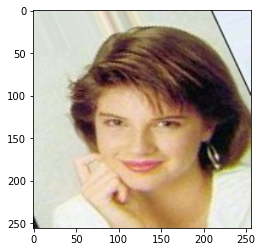

In [41]:
def normalize_tensor(tensor):
    tensor = tensor.clone()  # avoid modifying tensor in-place

    def norm_ip(img, min, max):
        img.clamp_(min=min, max=max)
        img.add_(-min).div_(max - min + 1e-5)
        return img

    return norm_ip(tensor, float(tensor.min()), float(tensor.max()))

import matplotlib.pyplot as plt


img = normalize_tensor(X[0,:,:,:])
img = img.cpu().numpy()
img = np.rollaxis(img, 0, 3)
plt.imshow(img)

In [64]:
next(iter(val_dataloader))[1]

tensor([[[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 1., 0., 0., 0., 1.]],

        [[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
          1., 0., 1., 0., 0., 1.]],

        [[0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
          1., 0., 1., 0., 0., 1.]],

        [[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
          1., 0., 1., 0., 0., 1.]],

        [[0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
          0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
          0., 0., 0., 0., 0., 1.]],

        [[0., 1., 0., 1., 0., 0., 0

In [68]:
X.shape

torch.Size([8, 3, 256, 256])

In [69]:
X, y = next(iter(val_dataloader))
X, y = X.to(device), y.to(device) # data to GPU


In [77]:
print(model(X[:,:,:,:])[:,9])

tensor([ 1.6997, -6.6590, -8.8303, -3.1317,  1.2236, -8.5811, -2.6867,  1.7240],
       device='cuda:0', grad_fn=<SelectBackward>)


In [85]:
X.shape

torch.Size([8, 3, 256, 256])

In [105]:
i=4
model.eval()
model(X[i:i+1,:,:,:])[:,9]

tensor([1.2033], device='cuda:0', grad_fn=<SelectBackward>)

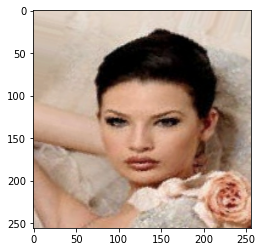

In [97]:
img = normalize_tensor(X[5,:,:,:])
img = img.cpu().numpy()
img = np.rollaxis(img, 0, 3)
plt.imshow(img)